# Assignment 11
## Gal Dali

### Question 1

#### The Wiener process

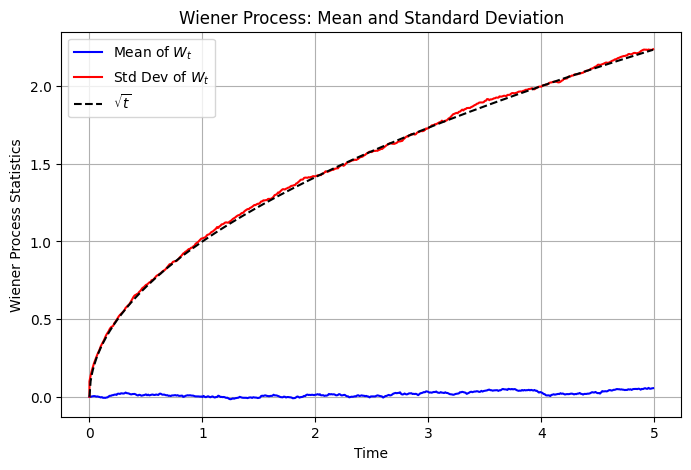

In [15]:
import numpy as np

dt = 0.01
T = 5
realizations = 1000
times = np.arange(0, T, dt)
dw = np.random.normal(0, np.sqrt(dt), (realizations, len(times)))
W = np.cumsum(dw, axis=1)
W = np.hstack((np.zeros((realizations, 1)), W))  # Add W_0 = 0
times = np.insert(times, 0, 0)  # Ensure time array aligns


average = np.mean(W, axis=0)
std_dev = np.std(W, axis=0)

# plot the average and the standard deviation of the position as a function of time
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(times, average, label='Mean of $W_t$', color='blue')
plt.plot(times, std_dev, label='Std Dev of $W_t$', color='red')
plt.plot(times, np.sqrt(times), 'k--', label=r'$\sqrt{t}$')
plt.xlabel('Time')
plt.ylabel('Wiener Process Statistics')
plt.legend()
plt.grid(True)
plt.title('Wiener Process: Mean and Standard Deviation')
plt.show()

### Question 2

#### Euler-Maruyama method

$ dx = -b x \cdot ln(x) \cdot dt + cx \cdot dw $

$ x_0 = 0 $

#### part A: Ito's formula

$ dy = \frac{\partial y}{\partial t} dt + \frac{\partial y}{\partial x} dx + \frac{1}{2} \frac{\partial^2 y}{\partial x^2} dx^2 $

$ dy = \left(\frac{\partial y}{\partial t} + g(x,t)y' + \frac{1}{2} f^2(x, t) y'' \right) dt + f(x,t)y' dw $

$ y(x, t) := e^{bt} \cdot ln(x) $

$ \frac{\partial y}{\partial t} = b \cdot e^{bt} \cdot ln(x) $

$ \frac{\partial y}{\partial x} = y' = \frac{e^{bt}}{x} $

$ \frac{\partial^2 y}{\partial x^2} = y'' = -\frac{e^{bt}}{x^2} $

$ g(x, t) = -bx \cdot ln(x) $

$ f(x, t) = cx $

$ \text{Using Ito's formula: } $

$ dy = \left(b \cdot e^{bt} \cdot ln(x) + -bx \cdot ln(x) \frac{e^{bt}}{x} + \frac{1}{2} c^2x^2 (-\frac{e^{bt}}{x^2}) \right) dt + cx \frac{e^{bt}}{x} dw $

$ dy = -\frac{c^2e^{bt}}{2} dt + c \cdot e^{bt} dw $

$ y = -\frac{c^2 e^{bt}}{2b} + c \int e^{bt} dw $

$ e^{bt} \cdot ln(x) = y = -\frac{c^2 e^{bt}}{2b} + c \int e^{bt} dw $

$ ln(x) = -\frac{c^2}{2b} + e^{-bt}c \int e^{bt'} dw $

$ x = e^{-\frac{c^2}{2b}} \cdot e^{e^{-bt}c \int e^{bt'} dw} $

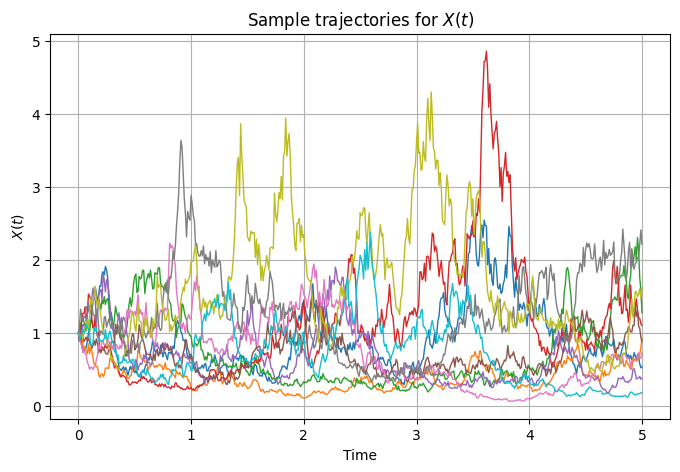

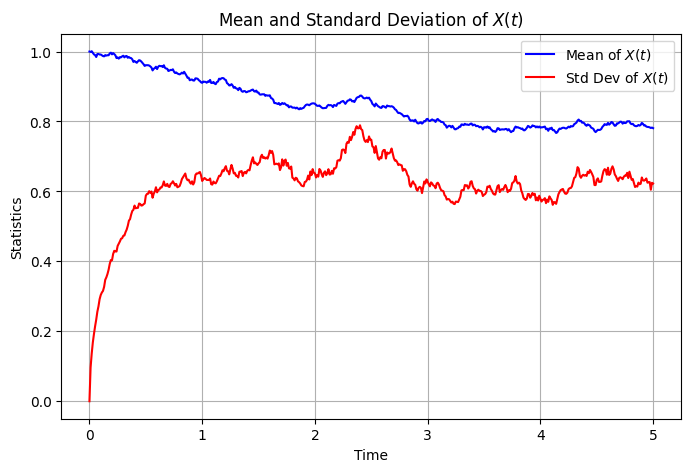

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
dt = 0.01         # time step
T = 5             # total time
realizations = 1000  # number of simulated paths

# SDE parameters for the transformed process:
b = 1.0   # parameter in the transformation (can be adjusted)
c = 1.0   # parameter from the SDE (can be adjusted)

# Create the time grid (include t=0)
times = np.arange(0, T + dt, dt)  # array of times from 0 to T

# Generate increments of the Wiener process (Brownian motion)
# Note: There are len(times)-1 increments.
dw = np.random.normal(0, np.sqrt(dt), (realizations, len(times) - 1))
# Compute the Wiener process W(t) by cumulative sum; ensure W(0)=0
W = np.cumsum(dw, axis=1)
W = np.hstack((np.zeros((realizations, 1)), W))  # shape: (realizations, len(times))

# Compute the stochastic integral I(t) = ∫₀ᵗ e^(b*s) dW(s)
# For the Riemann sum approximation, we use the left endpoints.
exp_bs = np.exp(b * times[:-1])  # values of e^(b*s) at each time step (excluding the final point)
I = np.cumsum(exp_bs * dw, axis=1)  # cumulative sum along time axis
I = np.hstack((np.zeros((realizations, 1)), I))  # set I(0) = 0

# Now compute ln X(t) using the formula:
# ln X(t) = - (c^2/(2b))*(1 - e^(-b*t)) + c*e^(-b*t)*I(t)
exp_minus_bt = np.exp(-b * times)  # e^(-b*t) for all t in the grid
deterministic_term = - (c**2) / (2 * b) * (1 - np.exp(-b * times))
# We broadcast exp_minus_bt over the realizations to combine with I(t)
lnX = deterministic_term + c * (exp_minus_bt)[None, :] * I

# Finally, recover X(t)
X = np.exp(lnX)

# Plot a few sample trajectories of X(t)
plt.figure(figsize=(8, 5))
for i in range(10):  # plot 10 sample paths
    plt.plot(times, X[i, :], lw=1)
plt.xlabel('Time')
plt.ylabel('$X(t)$')
plt.title('Sample trajectories for $X(t)$')
plt.grid(True)
plt.show()

# Optionally, plot the mean and standard deviation of X(t)
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

plt.figure(figsize=(8, 5))
plt.plot(times, mean_X, label='Mean of $X(t)$', color='blue')
plt.plot(times, std_X, label='Std Dev of $X(t)$', color='red')
plt.xlabel('Time')
plt.ylabel('Statistics')
plt.title('Mean and Standard Deviation of $X(t)$')
plt.legend()
plt.grid(True)
plt.show()
